## Linear Regression in Python

### Load data

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset(name = 'car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


It's desired to confirm the relationship between the degree of alcohol and the number of accidents

### Variable selection

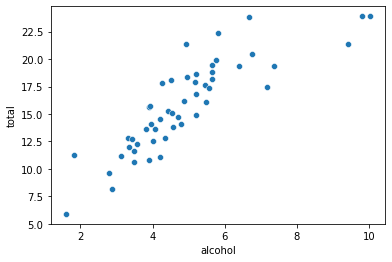

In [3]:
sns.scatterplot(x = 'alcohol', y = 'total', data = df);

### Model training

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

explanatory_var = np.array(df['alcohol']).reshape(-1,1)
response_var = df['total']

model = LinearRegression()

model.fit(X = explanatory_var, y = response_var)

model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 '_residues': 231.9688865331006,
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.857776154826299}

$$
total = 5.86 + 2.03 \cdot alcohol 
$$

### Make predictions

In [5]:
y_predic = model.predict(X = df[['alcohol']])

df.insert(0, 'prediction', y_predic)

df.head()

C:\Users\juand\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,prediction,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,17.321112,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,15.054867,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,16.443069,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,17.695093,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.686997,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Visualize the model

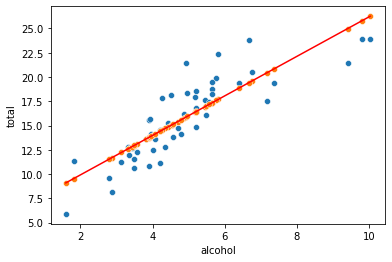

In [10]:
sns.scatterplot(x = 'alcohol', y = 'total', data = df)
sns.scatterplot(x = 'alcohol', y = 'prediction', data = df)
sns.lineplot(x = 'alcohol', y = 'prediction', data = df, color = 'red');

### Goodness of fit

In [12]:
model.score(X = explanatory_var, y = response_var)

0.7269492966665405

### Insights

1- The model explain a 72% of original variability from total accidents. 

2- For each unit of alcohol that increases, the total number of accidents will double (2.03).